In [3]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut


%matplotlib notebook

<IPython.core.display.Javascript object>


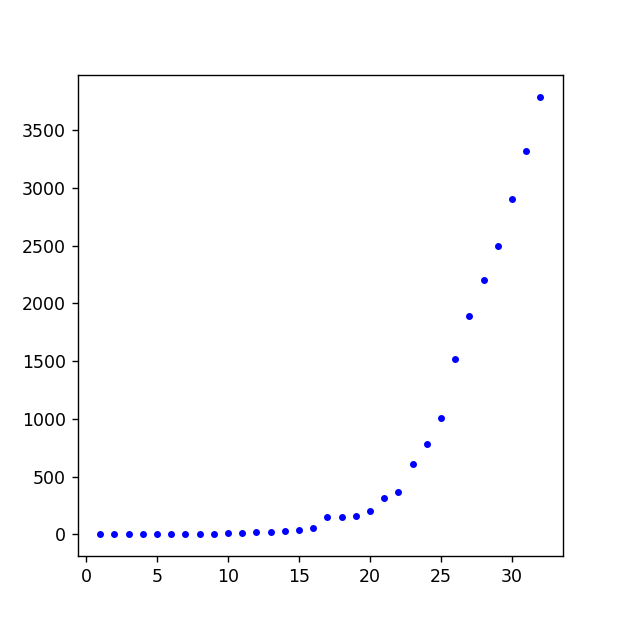

In [6]:
df = pd.read_csv('./covid19.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'b.')

# Holdout cross-validation (80/20%)

In [8]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Split the whole set into random training and validation set.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=10)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val))

include_bias = False

mean_vec = []
std_vec = []
for d in range(1, 12):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    polynomial_regression.fit(x_train, y_train)
    
    y_val_predict = polynomial_regression.predict(x_val)
    
    mean_vec.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

tamanho conjunto de treinamento: 25
tamanho conjunto de validação: 7
Tempo de execução: 0.0387 [s]


<IPython.core.display.Javascript object>


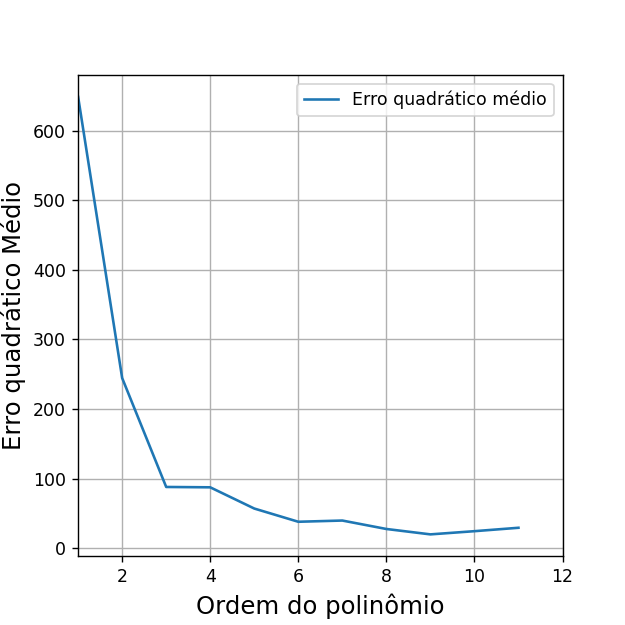

In [9]:
# Plot results.
plt.figure(figsize=(5, 5))
plt.plot(range(1, 12), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()
# Save figure
plt.savefig("holdout.png", dpi=600)
#Show the plot.
plt.show()

## k-fold cross-validation (k=10)

In [11]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the k-Fold object.
kfold = KFold(n_splits=10, shuffle=True, random_state=100)

mean_vec = []
std_vec = []
for d in range(1, 12):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=kfold)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 0.3007 [s]


<IPython.core.display.Javascript object>


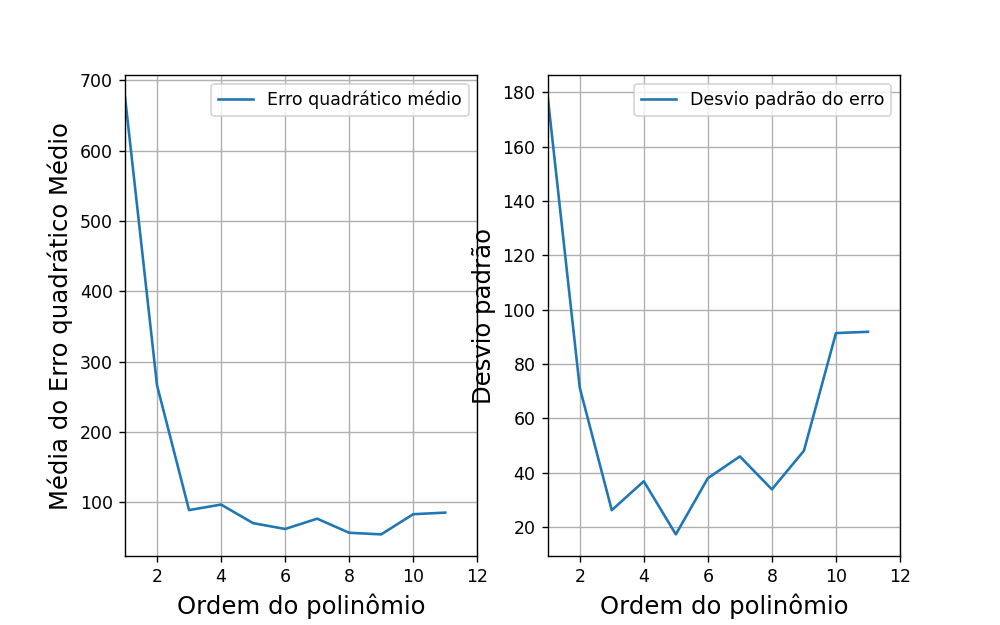

In [15]:
# Plot results.
plt.figure(figsize=(8, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 12), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 12), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

# Save figure
plt.savefig("kfold.png", dpi=600)
#Show the plot.
plt.show()

# Leave-one-out cross-validation (p =1)

In [22]:
# Get timestamp of holdout start.
starttime = timeit.default_timer()

# Instantiate the LPOCV object.
lpocv = LeavePOut(p=1)

mean_vec = []
std_vec = []
for d in range(1, 12):
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    lin_scores = cross_val_score(polynomial_regression, x, y, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = np.sqrt(-lin_scores)
    mean_vec.append(scores.mean())
    std_vec.append(scores.std())
    
print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime))

Tempo de execução: 0.8993 [s]


<IPython.core.display.Javascript object>


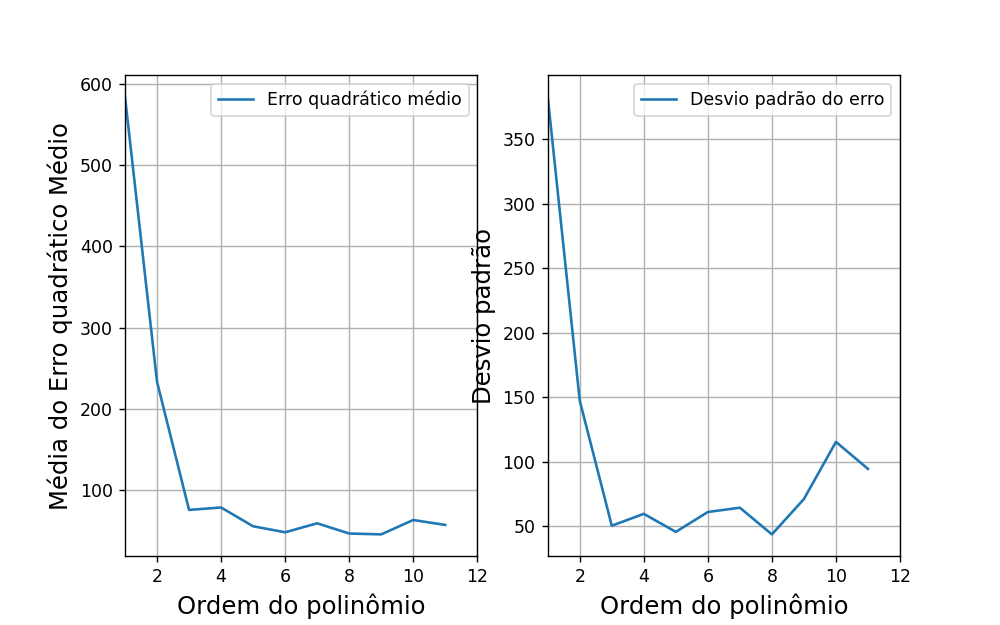

In [24]:
# Plot results.
plt.figure(figsize=(8, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(range(1, 12), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Média do Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

ax = plt.subplot(1, 2, 2)
plt.plot(range(1, 12), std_vec,  label='Desvio padrão do erro')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()

# Save figure
plt.savefig("leave_one_out.png", dpi=600)
#Show the plot.
plt.show()

<IPython.core.display.Javascript object>


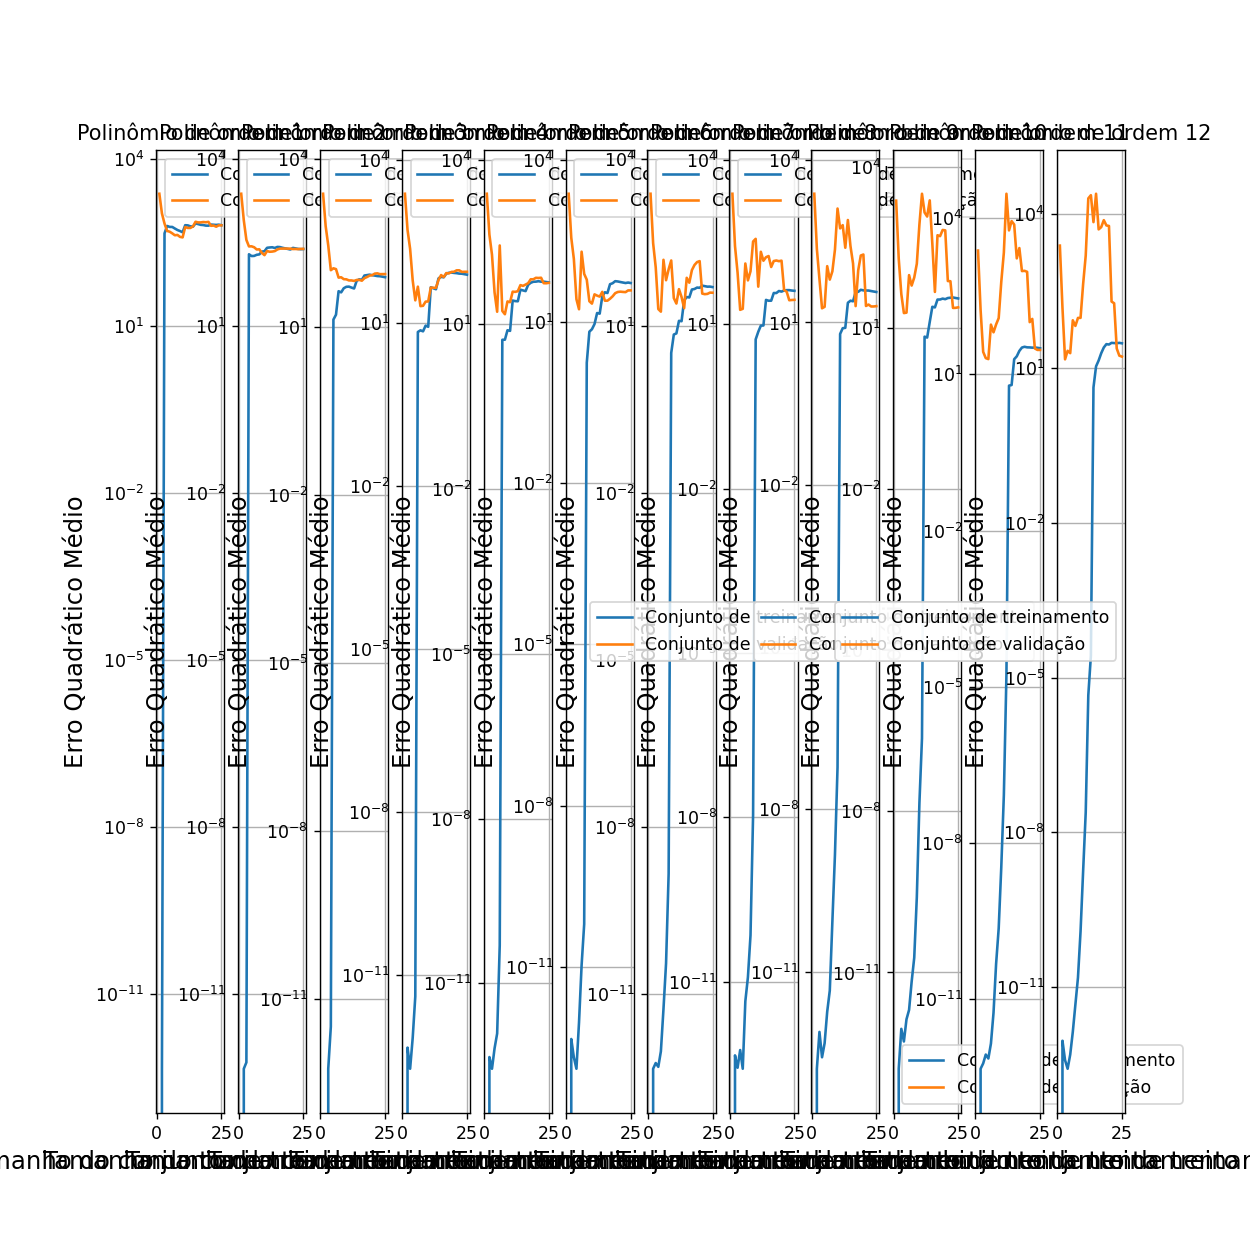

In [40]:
# Polinomial degrees to be tested.

degrees1 = np.linspace(1, 12, 12)

degrees = degrees1.astype(int)

plt.figure(figsize=(10, 10))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)

    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=degrees[i], include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()

    # Create a pipeline of actions.
    polynomial_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])

    error_training = []
    error_validation = []
    for m in range(1,len(x_train)+1):

        # Perform polynomial regression.
        polynomial_regression.fit(x_train[:m], y_train[:m])

        # Use the trained model for prediction of the training set.
        y_train_predict = polynomial_regression.predict(x_train[:m])

        # Use the trained model for prediction of the validation set.
        y_val_predict = polynomial_regression.predict(x_val)       

        # Calculate MSE for training set.
        error_training.append(mean_squared_error(y_train[:m], y_train_predict))

        # Calculate MSE for validation set.
        error_validation.append(mean_squared_error(y_val, y_val_predict))       

    plt.plot(range(1,len(x_train)+1), np.sqrt(error_training), label='Conjunto de treinamento')
    plt.plot(range(1,len(x_train)+1), np.sqrt(error_validation), label='Conjunto de validação')
    plt.yscale('log')
    plt.xlabel('Tamanho do conjunto de treinamento', fontsize=14)
    plt.ylabel('Erro Quadrático Médio', fontsize=14)
    plt.grid()
    plt.title('Polinômio de ordem '+str(degrees[i]))
    plt.legend(loc='best')
    
# Save figure
plt.savefig("learning_curves.png", dpi=600)
#Show the plot.
plt.show()

# LETRA C

<IPython.core.display.Javascript object>


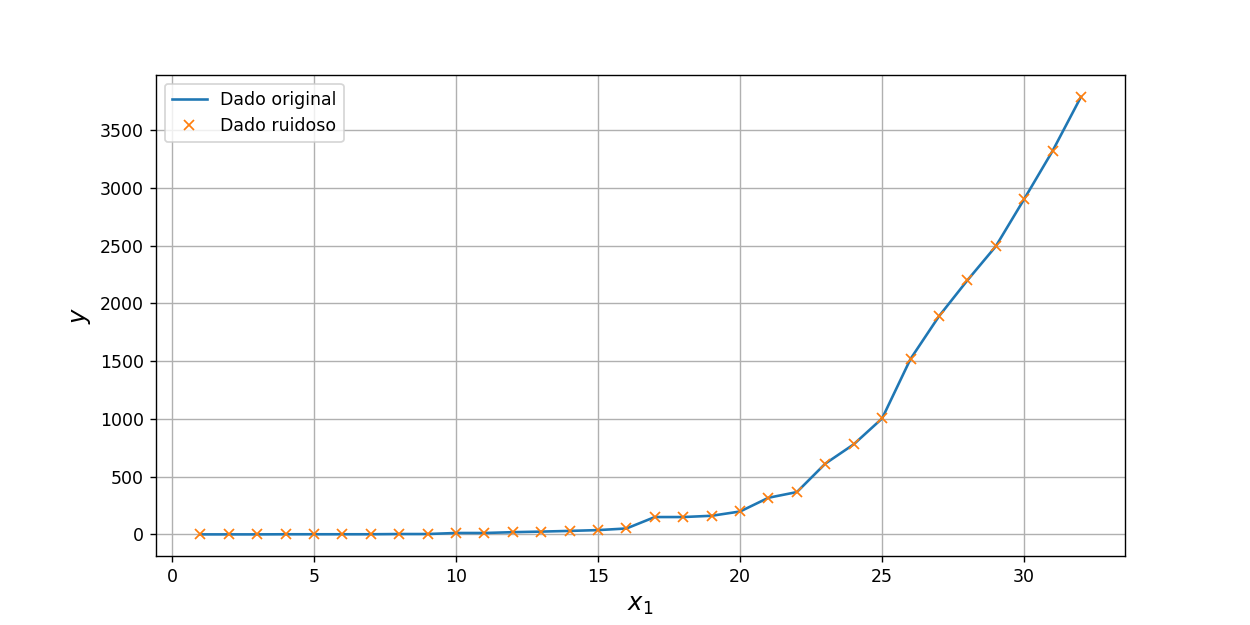

In [74]:
# Polinomial degrees to be tested.
degrees = 3

# Include column of ones once the target function has a bias.
include_bias = False

plt.figure(figsize=(10, 5))
plt.setp(ax, xticks=(), yticks=())    

# Instantiate a polynomial with the given degree.
poly_features = PolynomialFeatures(degree=degrees, include_bias=include_bias)
# Instantiate a scaler that will standardize the features.
std_scaler = StandardScaler()
# Instantiate a linear regressor.
lin_reg = LinearRegression()

# Create a pipeline of actions.
polynomial_regression = Pipeline([
    ("poly_features", poly_features),
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg),
    ])

# Train the polinomial model, i.e., the hypothesis.
polynomial_regression.fit(x,y)

plt.plot(x, y, label='Dado original')
plt.plot(x, y, 'x', label='Dado ruidoso')
plt.legend(loc='best')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
#plt.title("Grau do polinômio: {}\nMSE = {:.2e} (+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

#Show the plot.
plt.show()

<IPython.core.display.Javascript object>


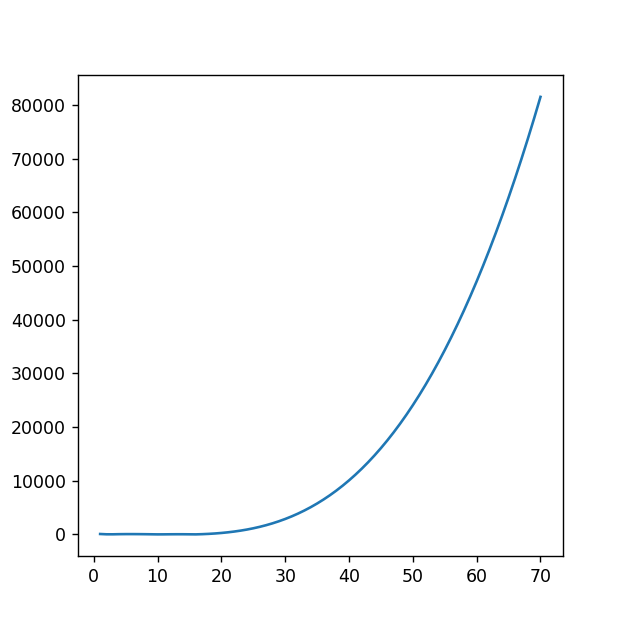

[]

In [75]:
# Prediction Vector
x_prediction1 = np.linspace(1, 70, 70).reshape(70,1)

x_prediction = x_prediction1.astype(int)

# Use the trained model for prediction of the training set.
y_train_predict = polynomial_regression.predict(x_prediction)
y_train_predict = abs(y_train_predict)

#configuro o gráfico a ser exibido (lambda vs. erro)
fig = plt.figure(figsize=(5,5))
plt.plot(x_prediction, y_train_predict)
plt.plot()

In [76]:
print(y_train_predict)

[[7.58516043e+01]
 [2.04064171e+01]
 [1.82024323e+01]
 [4.22134777e+01]
 [5.38652528e+01]
 [5.53962915e+01]
 [4.90451274e+01]
 [3.70502943e+01]
 [2.16503260e+01]
 [5.08375616e+00]
 [1.04108814e+01]
 [2.25950529e+01]
 [2.92302246e+01]
 [2.80778628e+01]
 [1.68994337e+01]
 [6.54359642e+00]
 [4.44897614e+01]
 [9.91775948e+01]
 [1.72845631e+02]
 [2.67732402e+02]
 [3.86076444e+02]
 [5.30116289e+02]
 [7.02090472e+02]
 [9.04237526e+02]
 [1.13879598e+03]
 [1.40800438e+03]
 [1.71410125e+03]
 [2.05932513e+03]
 [2.44591454e+03]
 [2.87610803e+03]
 [3.35214413e+03]
 [3.87626136e+03]
 [4.45069828e+03]
 [5.07769340e+03]
 [5.75948526e+03]
 [6.49831240e+03]
 [7.29641335e+03]
 [8.15602664e+03]
 [9.07939081e+03]
 [1.00687444e+04]
 [1.11263259e+04]
 [1.22543739e+04]
 [1.34551269e+04]
 [1.47308235e+04]
 [1.60837021e+04]
 [1.75160014e+04]
 [1.90299598e+04]
 [2.06278159e+04]
 [2.23118082e+04]
 [2.40841752e+04]
 [2.59471556e+04]
 [2.79029877e+04]
 [2.99539102e+04]
 [3.21021616e+04]
 [3.43499804e+04]
 [3.669960

In [85]:
print(x_prediction[57])
print(y_train_predict[57])

[58]
[41713.2266422]


In [ ]:
'''
Já no dia 57, estariam quase lotados os leitos, porém estes se lotariam completamente durante o dia 58, após o inicio
determinado em 26/02/2020.

'''